## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
df=pd.read_csv('Crop_recommendation.csv')


In [3]:
df.shape

(2200, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
x=df.drop('label',axis=1)
y=df['label']

## Exploratory Data Analysis

In [12]:
x.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

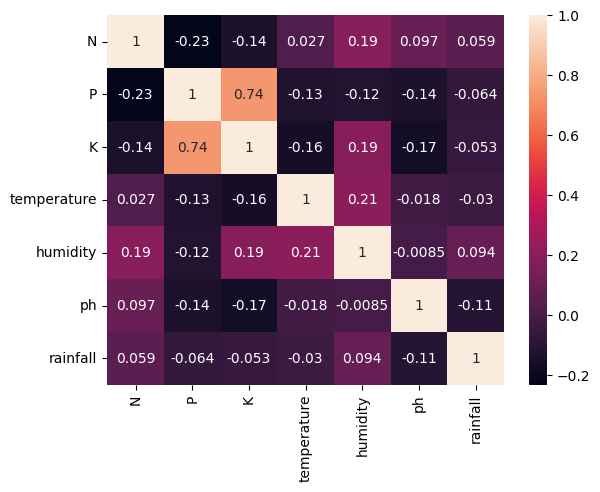

In [13]:
sns.heatmap(x.corr(),annot=True)

Text(0, 0.5, 'N')

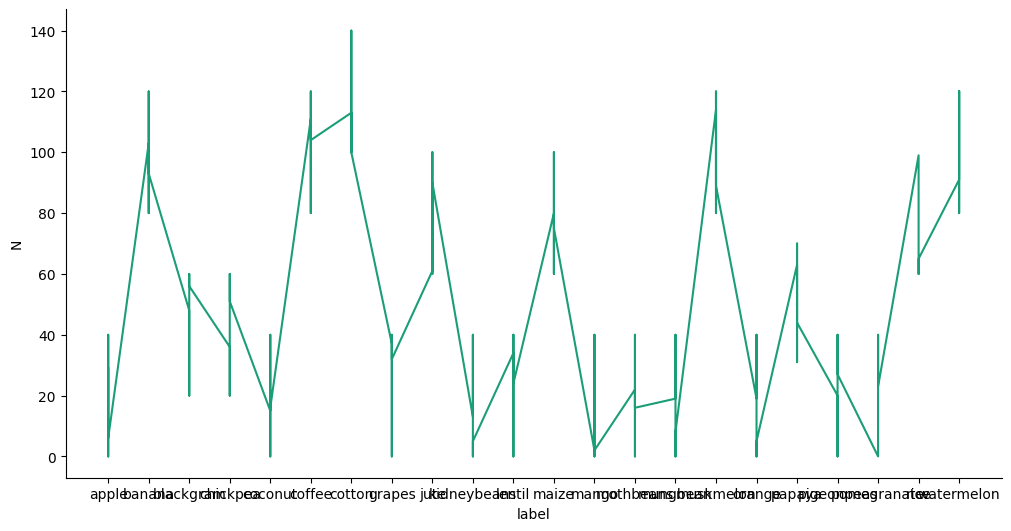

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['N']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
plt.ylabel('N')

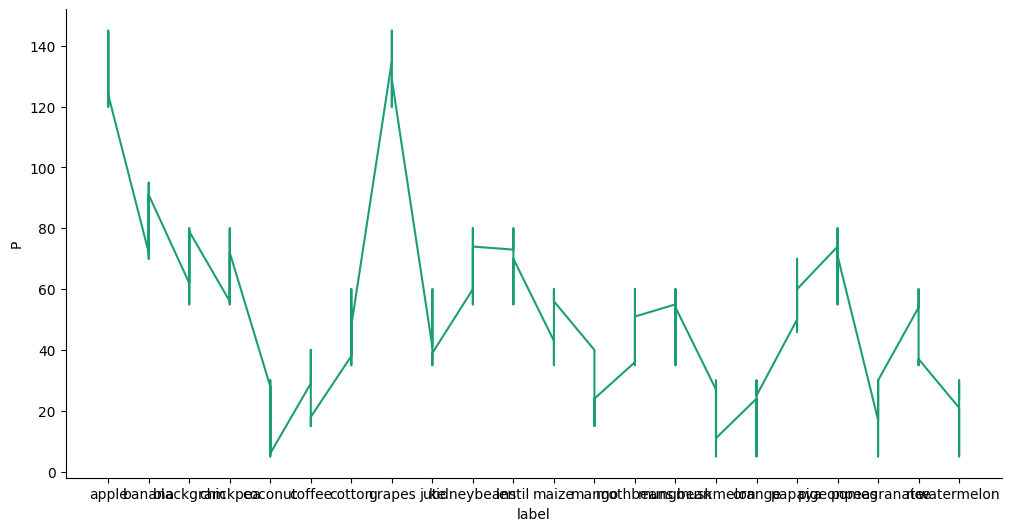

In [15]:
# @title label vs P

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['P']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('P')

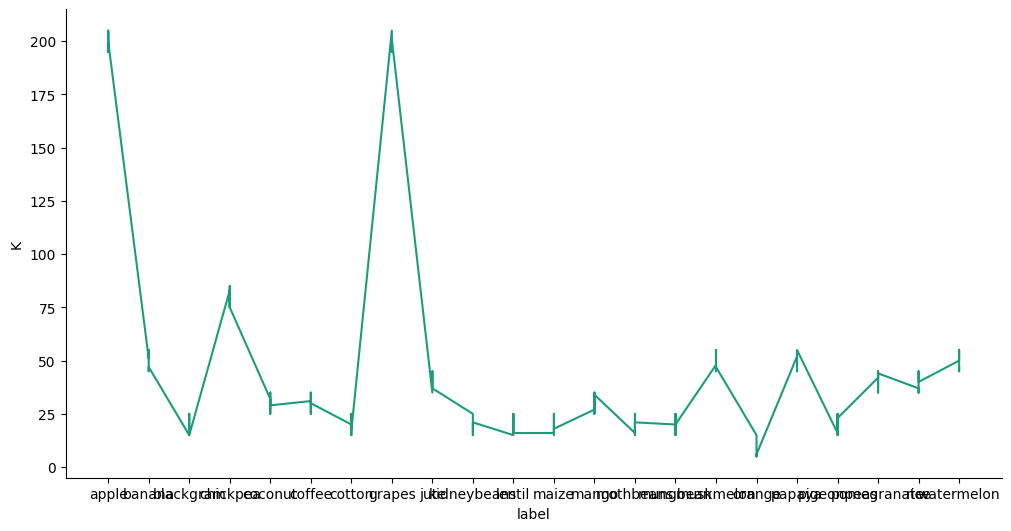

In [16]:
# @title label vs K

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['K']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('K')

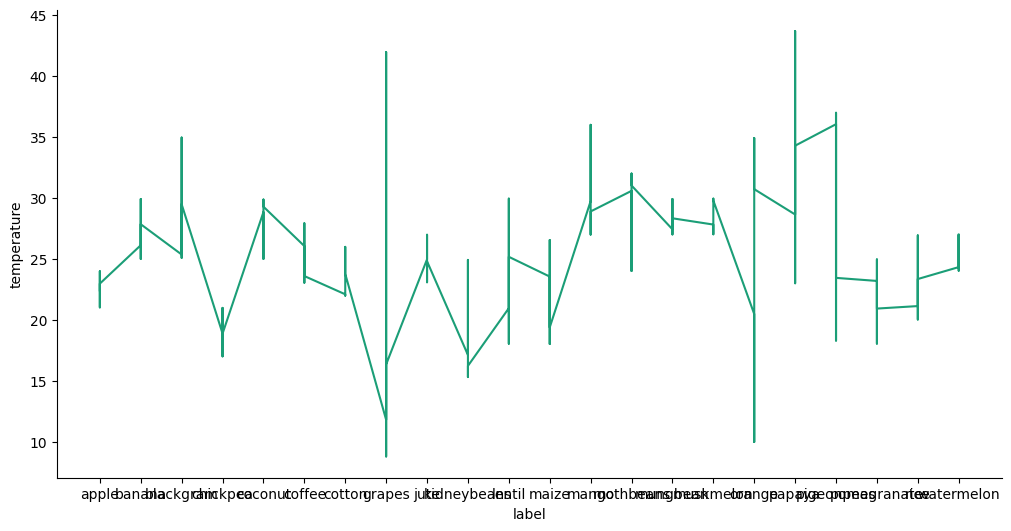

In [17]:
# @title label vs temperature

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['temperature']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('temperature')

<Figure size 1000x600 with 0 Axes>

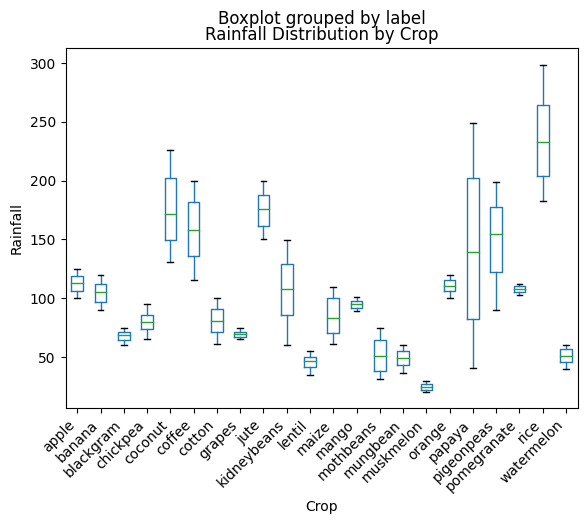

In [18]:
# @title Rainfall Distribution by Crop

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

df.boxplot(column='rainfall', by='label', grid=False)
plt.xlabel('Crop')
plt.ylabel('Rainfall')
plt.title('Rainfall Distribution by Crop')
_ = plt.xticks(rotation=45, ha='right')

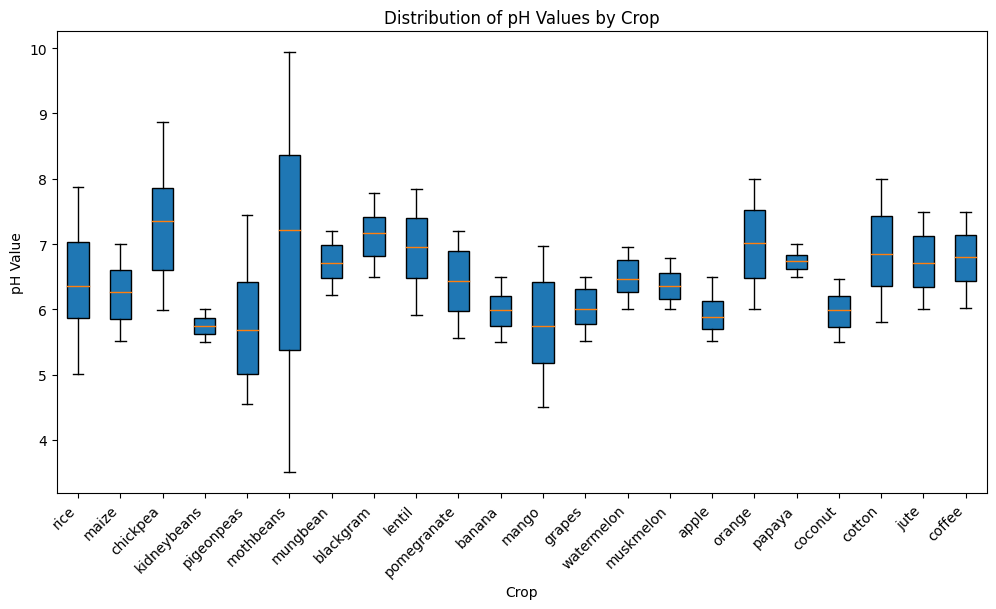

In [19]:
# @title Distribution of pH Values by Crop

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 6))
plt.boxplot([df['ph'][df['label'] == crop] for crop in df['label'].unique()], labels=df['label'].unique(), patch_artist=True)
plt.xlabel('Crop')
plt.ylabel('pH Value')
plt.title('Distribution of pH Values by Crop')
_ = plt.xticks(rotation=45, ha='right')

<Axes: xlabel='N', ylabel='Density'>

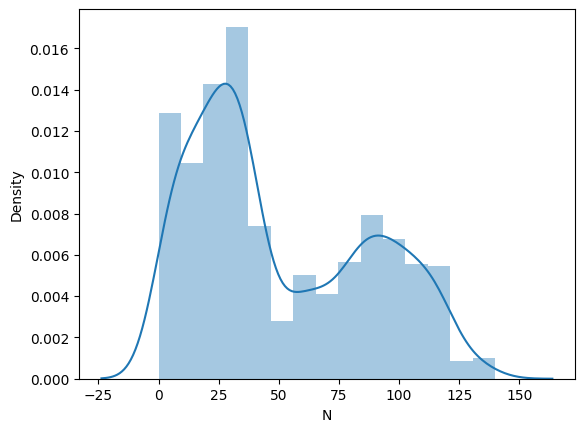

In [20]:
sns.distplot(df['N'])

<Axes: xlabel='P', ylabel='Density'>

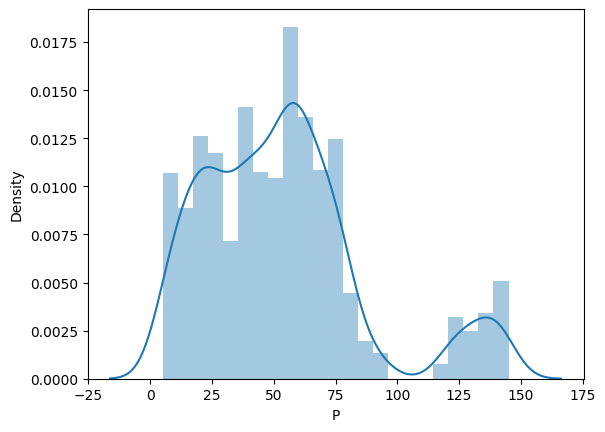

In [21]:
sns.distplot(df['P'])

<Axes: xlabel='K', ylabel='Density'>

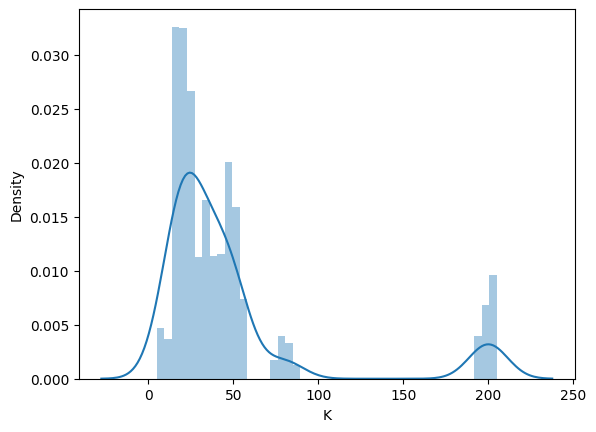

In [22]:
sns.distplot(df['K'])

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size = 0.2,random_state =2)

In [24]:
Xtrain

,N,P,K,temperature,humidity,ph,rainfall
1936,113,38,25,22.000851,79.472710,7.388266,90.422242
610,28,35,22,29.530376,86.733460,7.156563,59.872321
372,11,61,21,18.623288,23.024103,5.532101,135.337803
1559,29,139,205,23.641424,93.744615,6.155939,116.691218
1500,24,128,196,22.750888,90.694892,5.521467,110.431786
...,...,...,...,...,...,...,...
1071,105,88,54,25.787498,84.511942,6.020445,114.200546
433,27,71,23,23.453790,46.487148,7.109598,150.871220
674,23,39,22,29.256493,81.979522,6.864839,42.024833
1099,117,81,53,29.507046,78.205856,5.507642,98.125658


In [25]:
Xtest

,N,P,K,temperature,humidity,ph,rainfall
2121,83,21,28,25.567483,60.492446,7.466901,190.225784
960,1,27,36,23.985988,93.342366,5.684995,104.991282
952,23,5,44,21.207254,94.263047,7.163005,107.566080
1958,116,52,19,22.942767,75.371706,6.114526,67.080226
681,6,37,17,28.086572,80.350059,6.760694,38.144768
...,...,...,...,...,...,...,...
1684,7,17,10,10.164313,91.223210,6.465913,106.362551
1477,86,18,45,28.965866,90.718329,6.566759,22.258381
851,6,64,23,23.335652,67.404607,7.065264,36.186787
370,37,56,25,22.055923,19.603793,5.774755,126.726537


In [26]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

# Decision Tree

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

# Logistic Regression

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain_scaled = sc.fit_transform(Xtrain)
Xtest_scaled = sc.transform(Xtest)

In [30]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'multinomial', solver='lbfgs')

lr.fit(Xtrain_scaled,Ytrain)

predicted_values = lr.predict(Xtest_scaled)

x = accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9636363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.88      0.94      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       0.96      1.00      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xtrain, Ytrain)
predicted_values = rf.predict(Xtest)
x = accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Random Forest')
print("Random Forest's Accuracy is: ", x)



Random Forest's Accuracy is:  0.9954545454545455


# Support Vector Machine

In [32]:
from sklearn.svm import SVC
SVM = SVC(kernel='rbf', degree=3, C=1)
SVM.fit(Xtrain_scaled,Ytrain)
predicted_values = SVM.predict(Xtest_scaled)
x =accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB


NB=GaussianNB()

NB.fit(Xtrain,Ytrain)
predicted_values = NB.predict(Xtest)
x =accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

# K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain_scaled,Ytrain)
predicted_values = knn.predict(Xtest_scaled)
x =accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNN')
print("KNN's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))
conf = confusion_matrix(Ytest, predicted_values)
print(conf)

KNN's Accuracy is:  0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.96      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.90      0.95        21
       mango       0.93      1.00      0.96        26
   mothbeans       1.00      0.79      0.88        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      0.93      0.9

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

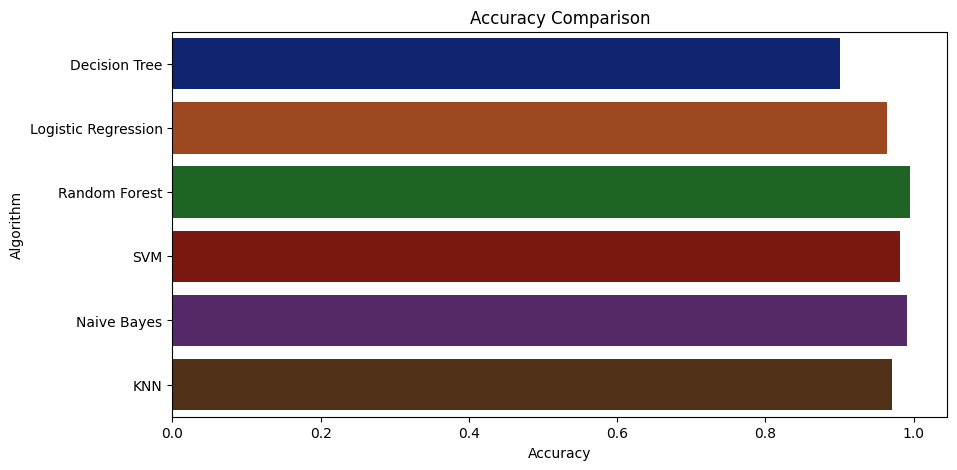

In [35]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [36]:
from tabulate import tabulate

# Combine the lists into a list of tuples
data = list(zip(model, acc))

# Print the data in a tabular format
print(tabulate(data, headers=["Model", "Accuracy"], tablefmt="pretty"))

+---------------------+--------------------+
|        Model        |      Accuracy      |
+---------------------+--------------------+
|    Decision Tree    |        0.9         |
| Logistic Regression | 0.9636363636363636 |
|    Random Forest    | 0.9954545454545455 |
|         SVM         | 0.9818181818181818 |
|     Naive Bayes     | 0.990909090909091  |
|         KNN         | 0.9704545454545455 |
+---------------------+--------------------+


In [37]:
data = np.array([[90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362]])
prediction =rf.predict(data)
print("The crop most suitable to be cultivated is:")
print(prediction)
# print(list(df_enc.keys())
#       [list(df_enc.values()).index(prediction)])

The crop most suitable to be cultivated is:
['rice']


In [38]:
data = np.array([[117,32,34,27,52.274423,6.798,127.9355362]])
prediction = rf.predict(data)

print("The crop most suitable to be cultivated is:")
print(prediction[0])

The crop most suitable to be cultivated is:
coffee


In [39]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = rf.predict(data)

print("The crop most suitable to be cultivated is:")
print(prediction[0])


The crop most suitable to be cultivated is:
jute


In [40]:
import joblib

In [41]:
filename='finalized_model'
joblib.dump(rf,'finalized_model')

['finalized_model']

In [42]:
app=joblib.load('finalized_model')

In [43]:
arr=[[104,18,30,23,60.3,6.7,140.9]]
y_pred=app.predict(arr)

In [44]:
y_pred

array(['coffee'], dtype=object)